In [20]:
import numpy as np

X = np.array([[5,3],  
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

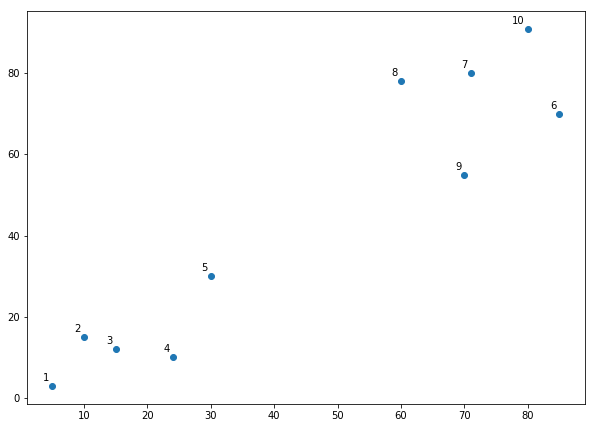

In [21]:
import matplotlib.pyplot as plt

labels = range(1, 11)  
plt.figure(figsize=(10, 7))  
plt.subplots_adjust(bottom=0.1)  
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):  
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

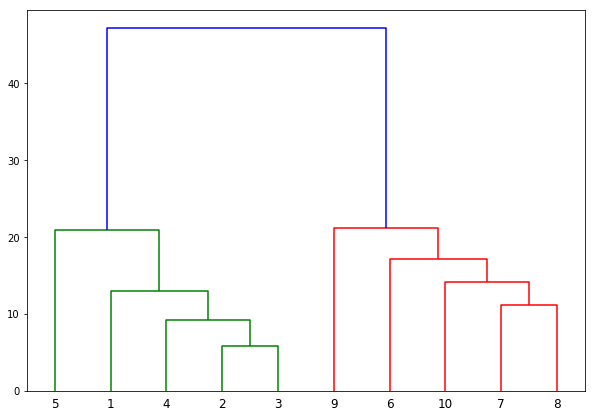

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))  
dendrogram(linked,  
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show() 

In [51]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X)  

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

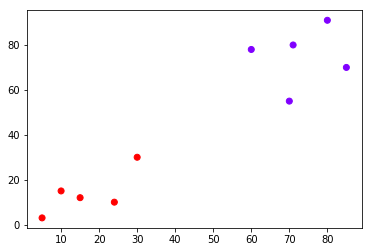

In [52]:
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow') 

In [25]:
#Clustering on real time data

In [70]:
import matplotlib.pyplot as plt  
import pandas as pd  
%matplotlib inline
import numpy as np

In [71]:
data = pd.read_csv('data.csv')  

In [72]:
data.shape

(200, 5)

In [73]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [74]:
data =data.iloc[:, 3:5].values

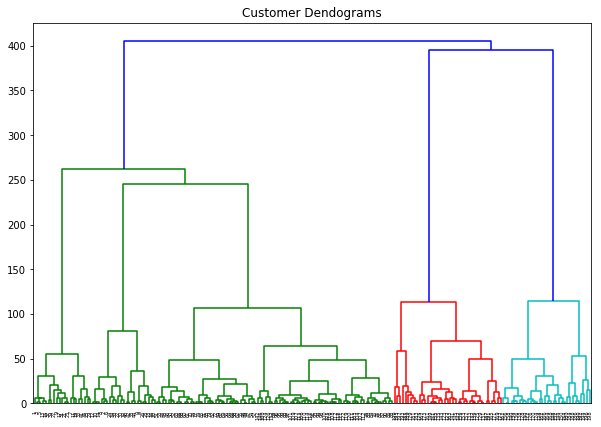

In [75]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [76]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data) 

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

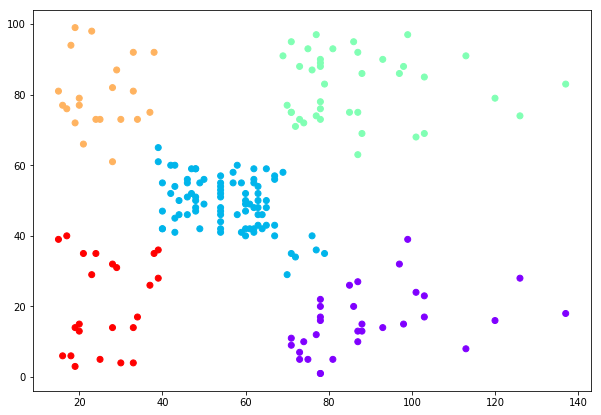

In [77]:
plt.figure(figsize=(10, 7))  
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow') 

In [78]:
#Example3

In [79]:
import numpy as np
from sklearn.cluster import MeanShift
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
		

In [80]:
centers = [[1,1],[5,5],[3,10]]
X, _ = make_blobs(n_samples = 500, centers = centers, cluster_std = 1)

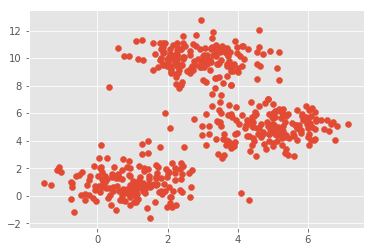

In [82]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [83]:
ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

In [84]:
print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Number of estimated clusters:", n_clusters_)

[[4.90078413 4.97524438]
 [2.92300714 9.88692607]
 [0.92906423 0.86584909]]
Number of estimated clusters: 3


In [85]:
colors = 10*['r.','g.','b.','c.','k.','y.','m.']

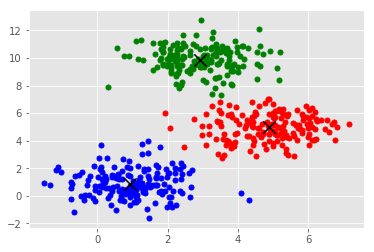

In [86]:
for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)

plt.scatter(cluster_centers[:,0],cluster_centers[:,1],
            marker="x",color='k', s=150, linewidths = 5, zorder=10)

plt.show()

Clustering in 3-D

Number of estimated clusters: 3


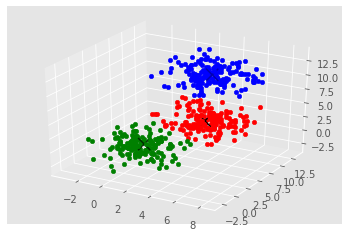

In [89]:
import numpy as np
from sklearn.cluster import MeanShift# as ms
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style
style.use("ggplot")

centers = [[1,1,1],[5,5,5],[3,10,10]]

X, _ = make_blobs(n_samples = 500, centers = centers, cluster_std = 1.5)



ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

#print(cluster_centers)

n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters:", n_clusters_)

colors = 10*['r','g','b','c','k','y','m']

#print(colors)
#print(labels)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(X)):

    ax.scatter(X[i][0], X[i][1], X[i][2], c=colors[labels[i]], marker='o')


ax.scatter(cluster_centers[:,0],cluster_centers[:,1],cluster_centers[:,2],
            marker="x",color='k', s=150, linewidths = 5, zorder=10)

plt.show()